In [53]:
import sys
import h5py
import numpy as np
from utils.get_groups import GetGroups
from utils.paths import SetupPaths
from utils.vectorCorrection import vectorCorrection as vector
from utils.abundance_matching import AbundanceMatching
import matplotlib.pyplot as plt
import pandas as pd

paths = SetupPaths()

# Groups
run make_groups.py

In [2]:
group_data_ill = h5py.File(f"{paths.path_groups}Illustris_135.hdf5", "r")
group_data_tng = h5py.File(f"{paths.path_groups}TNG_99.hdf5", "r")

keys: 
- dark, hydro
    - dwarf, massive
        - 'Group Mass', 'Group Number', 'Group Radius', 'Nsubs'

In [3]:
for sim in ["Illustris", "TNG"]:
    print(sim)
    print("_______________________")
    
    for phys in ["dark", "hydro"]:
        print(phys,"")

        for size in ["dwarf", "massive"]:
            if sim == "Illustris":
                data = group_data_ill
            else:
                data = group_data_tng
            print("      - ",size, len(np.array(data[phys][size]['Group Mass'])))
    
    print()
    print()

Illustris
_______________________
dark 
      -  dwarf 15357
      -  massive 1566
hydro 
      -  dwarf 16812
      -  massive 1429


TNG
_______________________
dark 
      -  dwarf 17860
      -  massive 1883
hydro 
      -  dwarf 16231
      -  massive 1854




# Max masses
run make_max_mass_file.slurm

In [4]:
max_data_ill = h5py.File(f"{paths.path_maxmass}Illustris_dark_135.hdf5", "r")
max_data_illh = h5py.File(f"{paths.path_maxmass}Illustris_hydro_135.hdf5", "r")
max_data_tng = h5py.File(f"{paths.path_maxmass}TNG_dark_99.hdf5", "r")
max_data_tngh = h5py.File(f"{paths.path_maxmass}TNG_hydro_99.hdf5", "r")

In [5]:
for sim in ["Illustris", "TNG"]:
    print(sim)
    print("_______________________")
    
    for phys in ["dark", "hydro"]:
        print(phys,"")

        if sim == "Illustris":
            data = max_data_ill
            
            if phys == "hydro":
                data = max_data_illh
            
        else:
            data = max_data_tng
            
            if phys == "hydro":
                data=max_data_tngh
            
            
        print("     all - ", len(np.array(data['Subhalo ID'])))
        print("     non-zero - ", np.sum( np.array(data['Max Mass']) != 0 ) )

    print()
    print()

Illustris
_______________________
dark 
     all -  110640
     non-zero -  110640
hydro 
     all -  80909
     non-zero -  80794


TNG
_______________________
dark 
     all -  135063
     non-zero -  135063
hydro 
     all -  96732
     non-zero -  96283




# Abundance Matching

In [6]:
am_data_ill = h5py.File(f"{paths.path_am_mass}Illustris_dark_135.hdf5", "r")
am_data_illh = h5py.File(f"{paths.path_am_mass}Illustris_hydro_135.hdf5", "r")
am_data_tng = h5py.File(f"{paths.path_am_mass}TNG_dark_99.hdf5", "r")
am_data_tngh = h5py.File(f"{paths.path_am_mass}TNG_hydro_99.hdf5", "r")

In [7]:
for sim in ["Illustris", "TNG"]:
    print(sim)
    print("_______________________")
    
    for phys in ["dark", "hydro"]:
        print(phys,"")

        if sim == "Illustris":
            data = am_data_ill
            
            if phys == "hydro":
                data = am_data_illh
            
        else:
            data = am_data_tng
            
            if phys == "hydro":
                data=am_data_tngh
            
            
        print("     all - ", len(np.array(data['Subhalo ID'])))
#         print("     non-zero - ", np.sum( np.array(data['Max Mass']) != 0 ) )

    print()
    print()

Illustris
_______________________
dark 
     all -  110640
hydro 
     all -  80909


TNG
_______________________
dark 
     all -  135063
hydro 
     all -  96732




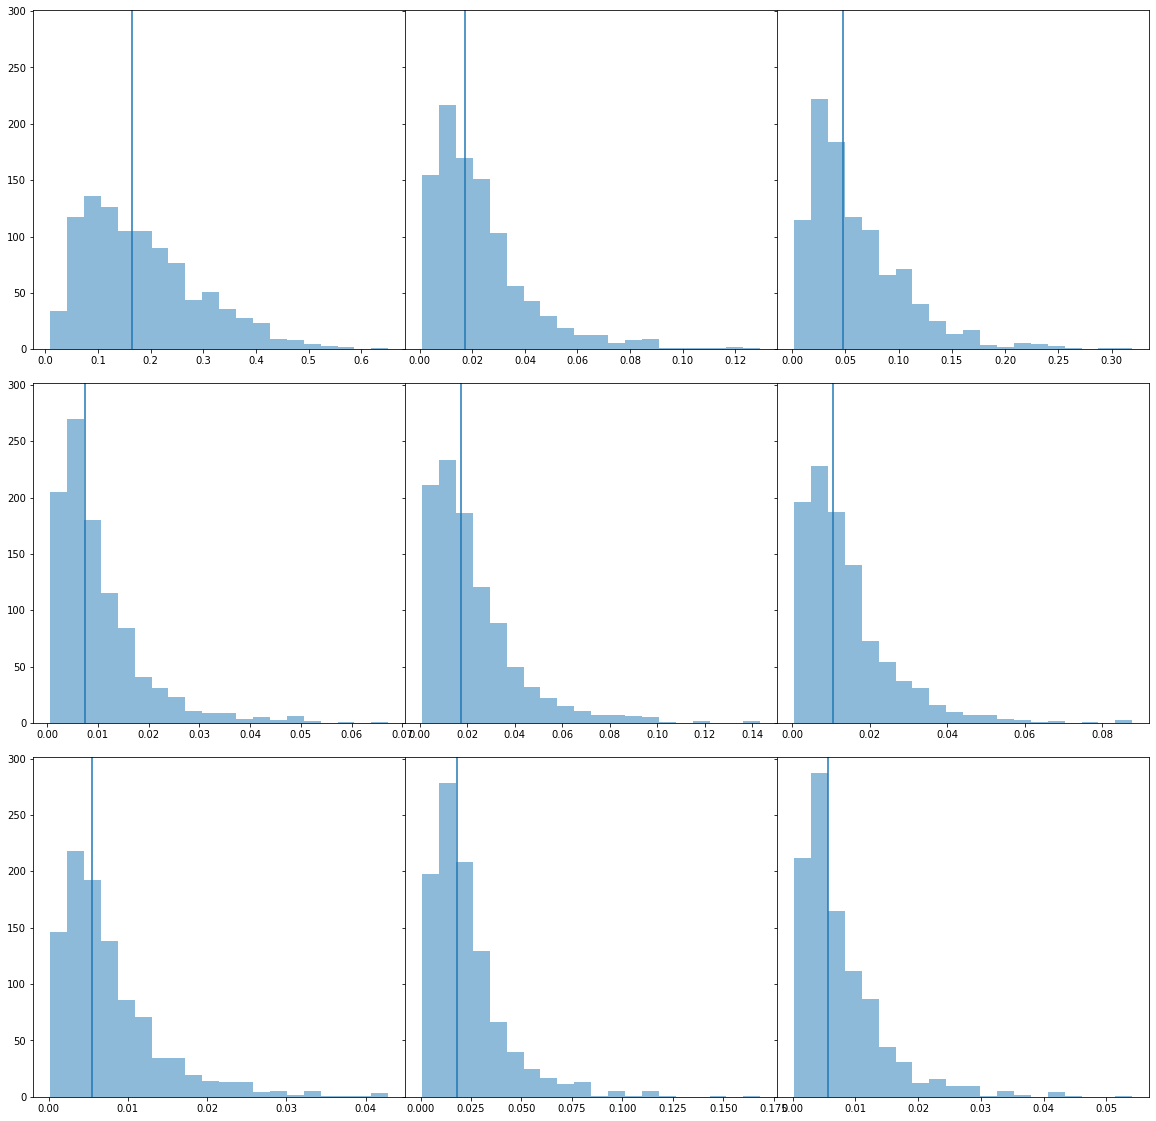

In [8]:
val = 3
fig,ax = plt.subplots(val,val, figsize=(20,20),sharey=True)
fig.subplots_adjust(hspace=0.1,wspace=0)
for i in range(val**2):
    row = i//val
    col = i%val
    ax[row][col].hist( np.array(am_data_ill['Stellar Masses'])[i+1000] , bins=20, alpha=0.5)
    ax[row][col].axvline( am_data_ill['Median Stellar Mass'][i+1000])
plt.show()

# Subhalos

In [9]:
sub_data_ill = h5py.File(f"{paths.path_subhalos}Illustris_135.hdf5", "r")
sub_data_tng = h5py.File(f"{paths.path_subhalos}TNG_99.hdf5", "r")

In [10]:
for sim in ["Illustris", "TNG"]:

    print(sim)
    print("_______________________")
    
    for phys in ["dark", "hydro"]:
        print(phys,"")

        if sim == "Illustris":
            data = sub_data_ill
            
        else:
            data = sub_data_tng
            
        print("     all - ", len(np.array(data[phys]['Subhalo ID'])))

    print()
    print()

Illustris
_______________________
dark 
     all -  110640
hydro 
     all -  80909


TNG
_______________________
dark 
     all -  135063
hydro 
     all -  96732




In [ ]:
sub_data_ill

# Pairs
keys:
'Group ID', 'Group Mass', 'Group Nsubs', 'Group Radius', 'Realization', 'RelVel', 'Separation', 'Stellar Mass Ratio', 'Sub1 BHMass', 'Sub1 BHMdot', 'Sub1 GasMetallicity', 'Sub1 ID', 'Sub1 Mass', 'Sub1 MassType', 'Sub1 Pos', 'Sub1 SFR', 'Sub1 SFRinRad', 'Sub1 Stellar Mass', 'Sub1 Vel', 'Sub2 BHMass', 'Sub2 BHMdot', 'Sub2 GasMetallicity', 'Sub2 ID', 'Sub2 Mass', 'Sub2 MassType', 'Sub2 Pos', 'Sub2 SFR', 'Sub2 SFRinRad', 'Sub2 Stellar Mass', 'Sub2 Vel', 'TripleFlag'

In [64]:
pair_data_ill = h5py.File(f"{paths.path_pairs}Illustris_135_10.hdf5", "r")
pair_data_tng = h5py.File(f"{paths.path_pairs}TNG_99_10.hdf5", "r")

In [65]:
for key in pair_data_ill['dark'].keys():
    print(key)#,len(sub_data_ill['dark']) )

Group ID
Group Mass
Group Nsubs
Group Radius
Realization
RelVel
Separation
Stellar Mass Ratio
Sub1 BHMass
Sub1 BHMdot
Sub1 GasMetallicity
Sub1 ID
Sub1 Mass
Sub1 MassType
Sub1 Pos
Sub1 SFR
Sub1 SFRinRad
Sub1 Stellar Mass
Sub1 Vel
Sub2 BHMass
Sub2 BHMdot
Sub2 GasMetallicity
Sub2 ID
Sub2 Mass
Sub2 MassType
Sub2 Pos
Sub2 SFR
Sub2 SFRinRad
Sub2 Stellar Mass
Sub2 Vel
TripleFlag


In [66]:
print(np.array(pair_data_ill['dark']["Sub1 BHMass"])[0:10])
print(np.array(pair_data_ill['hydro']["Sub1 BHMass"])[0:10])
print(np.array(pair_data_tng['dark']["Sub1 BHMass"])[0:10])
print(np.array(pair_data_tng['hydro']["Sub1 BHMass"])[0:10])

[0 0 0 0 0 0 0 0 0 0]
[0.03000956 0.03858007 0.03000956 0.03858007 0.03000956 0.03858007
 0.03000956 0.03858007 0.03858007 0.03858007]
[0 0 0 0 0 0 0 0 0 0]
[0.02217029 0.02217029 0.02374595 0.02217029 0.02217029 0.02217029
 0.02217029 0.02217029 0.02374595 0.02217029]


In [70]:
datt = pd.DataFrame([[key,np.array(pair_data_ill['hydro'][key])] for key in pair_data_ill['hydro'].keys()])

In [71]:
datt

,0,1
0,Group ID,"[137, 137, 137, 137, 137, 137, 137, 137, 137, ..."
1,Group Mass,"[614.1055714000355, 614.1055714000355, 614.105..."
2,Group Nsubs,"[91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 9..."
3,Group Radius,"[478.3946817571466, 478.3946817571466, 478.394..."
4,Realization,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, 0, ..."
5,RelVel,"[245.31878150542886, 245.31878150542886, 245.3..."
6,Separation,"[722.0080067913458, 722.0080067913458, 722.008..."
7,Stellar Mass Ratio,"[0.8570834518569364, 0.8144875581039269, 0.534..."
8,Sub1 BHMass,"[0.03000955753536387, 0.038580069403079426, 0...."
9,Sub1 BHMdot,"[0.003080167341977358, 0.00037405380862765014,..."


In [2]:
sim = "TNG"
snapshot=99

In [3]:
pair_path = f"{sim}_{snapshot}_10.hdf5"
pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

In [7]:
pair_data['dark']['massive'].keys()

<KeysViewHDF5 ['Group ID', 'Group Mass', 'Group Nsubs', 'Group Radius', 'Realization', 'RelVel', 'Separation', 'Stellar Mass Ratio', 'Sub1 ID', 'Sub1 Mass', 'Sub1 Pos', 'Sub1 Stellar Mass', 'Sub1 Vel', 'Sub2 ID', 'Sub2 Mass', 'Sub2 Pos', 'Sub2 Stellar Mass', 'Sub2 Vel']>

In [162]:
np.array(subhalo_data['dark']['massive']['Group ID'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [ ]:
paths.path

In [3]:
sim = "Illustris"
snapshot=85

path = f"{sim}_{snapshot}.hdf5"
data = h5py.File(f"{paths.path_subhalos}{path}", "r")

In [8]:
data.close()

In [7]:
data['dark']['dwarf'].keys()

<KeysViewHDF5 ['Group ID', 'Group Mass', 'Group Radius', 'Nsubs', 'Subhalo ID', 'Subhalo Mass', 'Subhalo Max Mass', 'Subhalo Max Mass Snap', 'Subhalo Med Stellar Mass', 'Subhalo Pos', 'Subhalo Stellar Masses', 'Subhalo Vel']>

In [171]:
sim = "TNG"
snapshot=15

am_path = f"{sim}_dark_{snapshot}.hdf5"
am_data = h5py.File(f"{paths.path_am_mass}{am_path}", "r")

In [172]:
mask = np.array(am_data['Group ID'])==2649

In [173]:
for i in am_data.keys():
    print(i)
    print(am_data[i][mask])

Current Snap Mass
[0.04679757 0.04379773]
Group ID
[2649 2649]
Max Mass
[0.13196836 0.13196836]
Max Mass Snap
[14 12]
Median Stellar Mass
[1.6520189e-05 1.6520189e-05]
Stellar Masses


TypeError: Boolean indexing array has incompatible shape

In [8]:
sim = "Illustris"
snapshot = 85

path = f"{sim}_{snapshot}_10.hdf5"
data = h5py.File(f"{paths.path_pairs}{path}", "r")

In [19]:
data['Header'].attrs['Redshift']

0.9972942257819404

In [ ]:
path = f"{sim}_{snapshot}_10.hdf5"
data = h5py.File(f"{paths.path_pairs}{path}", "r")

In [139]:
sim = "TNG"
snapshot = 14
num_reals = 10

## find subhalos for this simulation and snapshot #
subhalo_path = f"{sim}_{snapshot}.hdf5"
subhalo_data = h5py.File(f"{paths.path_subhalos}{subhalo_path}", "r")

savepath = f"{sim}_{snapshot}_testing.hdf5"
f = h5py.File(f"{paths.path_pairs}{savepath}", 'w')

redshift = subhalo_data["Header"].attrs["Redshift"]
scale = 1 / (1 + redshift)

units_dict = {
    "Group ID":"Group Number in Subfind Catalogs", 
    "Group Mass":"Physical mass from Group_M_TopHat200 -- 1e10 Msun",
    "Group Radius":"Physical radius from Group_R_TopHat200 -- kpc",
    "Group Nsubs":"Number of subhalos in group",
    "Sub1 ID":  "Subhalo ID at current snapshot",
    "Sub2 ID":  "Subhalo ID at current snapshot",
    "Sub1 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub2 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub1 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub2 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub1 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub2 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub1 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Sub2 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Separation": "Physical separation between primary and secondary in kpc",
    "RelVel": "Relative velocity between primary and secondary in km/s",
    "Stellar Mass Ratio": "Stellar mass ratio of secondary over primary", # in this case- it's by primary subhalo mass
    "Realization": "Stellar mass realization (0-1000)" }

#create header with simulation info
header_dict = {"Snapshot":snapshot,
        "Redshift":redshift,
        "Simulation":sim}

dset = f.create_group('/Header')
for key in header_dict.keys():
    dset.attrs[key] = header_dict[key]

f.close()


In [140]:
for phys in ["dark","hydro"]:
    try: 
        subhalo_data[phys]

    except KeyError:
        print(f"{phys} does not exist in this file: {subhalo_path}")
        break

    ## need to find pairs for dwarfs and massive
    for size in ["dwarf","massive"]:
        subhalo_dict = {}
        pair_data = {}
        pair_data = {"Group ID": [],
                     "Group Mass": [],
                     "Group Radius": [],
                     "Group Nsubs": [],
                     "Sub1 ID": [],
                     "Sub2 ID": [],
                     "Sub1 Mass": [],
                     "Sub2 Mass": [],
                     "Sub1 Stellar Mass": [],
                     "Sub2 Stellar Mass": [],
                     "Sub1 Pos": [],
                     "Sub2 Pos": [],
                     "Sub1 Vel": [],
                     "Sub2 Vel": [],
                     "Separation": [],
                     "RelVel": [],
                     "Stellar Mass Ratio": [],
                     "Realization": []}

        ## create dictionary of subhalo info
        for key,val in subhalo_data[phys][size].items():
            subhalo_dict[key] = np.array(val)
                
        uniqueGroups = np.unique(subhalo_dict['Group ID'])
        
        for groupNum in uniqueGroups:
            mask = subhalo_dict['Group ID'] == groupNum
            numPassingSubs = len(subhalo_dict['Nsubs'][mask])

            if numPassingSubs >=2:
                ### likely where i have to include the other realizations
                realNumbs = np.arange(-1,num_reals+1,1)
                
                for realization in realNumbs:
                    groupmass = subhalo_dict['Group Mass'][mask][0]
                    groupradius = subhalo_dict['Group Radius'][mask][0]

                    shortlist = {} # dictionary  of subhalos in group
                    for key, val in subhalo_dict.items():
                        shortlist[key] = np.array(val[mask])
                        
                    if realization == -1:
                        meds = shortlist["Subhalo Med Stellar Mass"]
                        primary_loc = np.where(meds==np.max(meds))
                        
                        meds_sansmax = np.where(meds==np.max(meds), 0, meds)
                        secondary_loc = np.where(meds==np.max(meds_sansmax))
                        
                        if all(meds_sansmax)==0:
                            secondary_loc = np.array(primary_loc[0]+1)
                        
                        stel1 = shortlist['Subhalo Med Stellar Mass'][primary_loc][0]
                        stel2 =  shortlist['Subhalo Med Stellar Mass'][secondary_loc][0]
                        
                    else:
                        stells = shortlist["Subhalo Stellar Masses"][:,realization]
                        primary_loc = np.where(stells==np.max(stells))

                        stells_sansmax = np.where(stells==np.max(stells), 0, stells)
                        secondary_loc = np.where(stells==np.max(stells_sansmax))

                        stel1 = shortlist['Subhalo Stellar Masses'][primary_loc][0][realization]
                        stel2 =  shortlist['Subhalo Stellar Masses'][secondary_loc][0][realization]

                    id1 = shortlist['Subhalo ID'][primary_loc][0]
                    id2 = shortlist['Subhalo ID'][secondary_loc][0]
                    mass1 = shortlist['Subhalo Mass'][primary_loc][0]
                    mass2 = shortlist['Subhalo Mass'][secondary_loc][0]
                    pos1 = shortlist['Subhalo Pos'][primary_loc][0]
                    pos2 = shortlist['Subhalo Pos'][secondary_loc][0]
                    vel1 = shortlist['Subhalo Vel'][primary_loc][0]
                    vel2 = shortlist['Subhalo Vel'][secondary_loc][0]

                    # note: box size is physical units!
                    if sim == "Illustris":
                        boxsize = 106.5 # in Mpc!
                    elif sim == "TNG":
                        boxsize = 110.7 # in Mpc!

                    sep = np.linalg.norm( np.array(vector(pos1,pos2,boxsize*1000) ) )
                    relvel = np.linalg.norm(vel1-vel2)
                    stlrt = stel2/stel1

                    pairlist = np.array([groupNum, groupmass, groupradius, numPassingSubs, 
                                id1, id2, mass1, mass2, stel1, stel2, 
                                pos1, pos2, vel1, vel2, 
                                sep, relvel, stlrt, realization])

                    for ind, key in enumerate(pair_data.keys()):
                        pair_data[key].append(pairlist[ind])
        print(f"going to try and save {size} {phys}")
        
#         f = h5py.File(f"{paths.path_pairs}{savepath}", 'r+')

#         for key, val in pair_data.items():
#             val = np.array(val)
#             dset = f.create_dataset(f'/{phys}/{size}/{key}', 
#                                     shape=val.shape,
#                                     dtype=val.dtype)
#             dset.attrs[key] = units_dict[key]
#             dset[:] = val
#         f.close()
        print(f"successfully wrote {size} {phys} to {savepath}")


KeyboardInterrupt: 

In [148]:
groupNum

1606

In [144]:
phys

'dark'

In [127]:
AbundanceMatching(0.05225592e10, 5.52, 1).stellar_mass(med=True)/1e10

3.4924220136527582e-06

In [141]:
shortlist['Subhalo Mass']

array([9.30244042, 0.92643559, 0.19219552, 0.10096907])

In [142]:
shortlist['Subhalo Max Mass']

array([9.302441  , 1.0309474 , 0.22673757, 0.12488281], dtype=float32)

In [145]:
shortlist['Subhalo Med Stellar Mass']

array([2.05917313e-02, 5.23335603e-04, 4.16880167e-05, 1.53915354e-05])

In [115]:
subhalo_data['Header'].attrs['Redshift']

5.5297658079491026

In [111]:
primary_loc

(array([6]),)

In [110]:
shortlist['Subhalo Med Stellar Mass'][primary_loc[0]]

array([2.06070247e-05])

In [95]:
shortlist

{'Group ID': array([2649, 2649], dtype=int32),
 'Group Mass': array([8.88531631, 8.88531631]),
 'Group Radius': array([22.14270336, 22.14270336]),
 'Nsubs': array([4, 4], dtype=int32),
 'Subhalo ID': array([41555, 41556]),
 'Subhalo Mass': array([8.65646193, 0.10073151]),
 'Subhalo Max Mass': array([0.13196836, 0.13196836], dtype=float32),
 'Subhalo Max Mass Snap': array([14, 12], dtype=int16),
 'Subhalo Med Stellar Mass': array([1.6520189e-05, 1.6520189e-05]),
 'Subhalo Pos': array([[14662.45377623, 10186.53578113,  6645.53405133],
        [14626.65671173, 10195.99659159,  6634.5154261 ]]),
 'Subhalo Stellar Masses': array([[1.66438400e-06, 1.29673115e-03, 5.89320843e-06, ...,
         2.06955982e-05, 1.10178784e-04, 5.80531734e-05],
        [6.90072529e-07, 4.10808784e-06, 2.37703643e-05, ...,
         3.74349809e-05, 1.39082063e-06, 7.14892058e-07]]),
 'Subhalo Vel': array([[124.18965912,  73.42002869, -64.13163757],
        [223.0753479 ,  14.25303268, -38.42409897]])}

In [31]:
groupNum


14826

In [87]:
all(np.array([0,0,0,0,0])==0)

True

In [80]:
meds = shortlist["Subhalo Med Stellar Mass"]
primary_loc = np.where(meds==np.max(meds))

meds_sansmax = np.where(meds==np.max(meds), 0, meds)
secondary_loc = np.where(meds==np.max(meds_sansmax))
                        
if all(meds_sansmax==0):
    print(False)

# stel1 = shortlist['Subhalo Med Stellar Mass'][primary_loc][0]
# stel2 =  shortlist['Subhalo Med Stellar Mass'][secondary_loc][0]

False


In [73]:
for key in shortlist.keys():
    print(key, shortlist[key])

Group ID [14826 14826]
Group Mass [12.3220777 12.3220777]
Group Radius [78.13954055 78.13954055]
Nsubs [4 4]
Subhalo ID [656227 656228]
Subhalo Mass [10.52836735  0.41439604]
Subhalo Max Mass [10.528367 10.528367]
Subhalo Max Mass Snap [85 84]
Subhalo Med Stellar Mass [0.03586521 0.03586521]
Subhalo Pos [[44004.03766665   622.48300485 44285.75202413]
 [43998.88709943   626.38660314 44300.96203248]]
Subhalo Stellar Masses [[0.02706607 0.01434706 0.00951731 ... 0.04569551 0.07696766 0.20124992]
 [0.00758318 0.07196741 0.00184457 ... 0.05858761 0.05899612 0.01940448]]
Subhalo Vel [[  58.45320892  -87.67569733 -296.86483765]
 [  57.5833168   -69.63285828 -256.28952026]]


In [41]:
uniqueGroups

array([ 1474,  1505,  1522, ..., 22327, 22333, 22442], dtype=int32)

In [33]:
uniqueGroups[np.where(uniqueGroups==groupNum)[0]-1]

array([14825], dtype=int32)

In [50]:
np.array(subhalo_data['dark']['dwarf']['Group ID'])==1474

array([ True,  True,  True, ..., False, False, False])

In [48]:
subhalo_data['dark']['dwarf']['Group ID'][0:10]

array([1474, 1474, 1474, 1474, 1474, 1474, 1474, 1474, 1474, 1474],
      dtype=int32)

In [69]:
mask = np.array(subhalo_data['dark']['dwarf']['Group ID']) == 14825
subhalo_data['dark']['dwarf']['Nsubs'][mask]

array([4], dtype=int32)

In [68]:
np.array(shortlist['Subhalo Stellar Masses'])[1,0:10]

array([0.00758318, 0.07196741, 0.00184457, 0.02158741, 0.05653187,
       0.05241256, 0.03774799, 0.03577967, 0.01855397, 0.08124634])

## negative stellar mass

In [2]:
meansneg=[]
sumneg=[]

In [30]:
stellars = inst.stellar_mass(med=True)
stellars = inst.stellar_mass()
print(np.mean(stellars/1e10))
print(np.median(stellars/1e10))

0.034623132297786324
0.025606381226418694


In [14]:
halo_maxmass = 9.107498915666389
inst= AbundanceMatching(maxmass=halo_maxmass*1e10, 
                                redshift=1.2,
                                samples=10000)
stellars = inst.stellar_mass(med=True)
meansneg.append(np.mean(stellars/1e10))
sumneg.append(np.sum(stellars<0))

In [15]:
print(meansneg)
print(np.mean(meansneg))

[0.03506980880486948, 0.035397735485087886, 0.034217957415455524, 0.0346020071503516, 0.03535498542398052, 0.034811329022998556, 0.03497295598257415, 0.03500942108397938, 0.035438402765762565, 0.03489371910602665, 0.0349191383890691, 0.034754562238214916]
0.03495350190569752


In [26]:
print(meansneg)
print(np.mean(meansneg))

[0.03566997256504131, 0.03515662182100625, 0.03511675022293628, 0.03504940914283485, 0.03453374712597531, 0.0348563676692634, 0.034534713155894216, 0.03501387785876937, 0.03510706455215177, 0.03552658108218223, 0.035441213347987534, 0.03484466638094478, 0.035285420182061926]
0.03508741577746533


In [27]:
print(sumneg)

[2, 15, 10, 5, 7, 10, 6, 14, 9, 5, 8, 8, 11]


In [104]:
inst= AbundanceMatching(maxmass=halo_maxmass*1e10, 
                                redshift=1.2,
                                samples=10000)

1000000

In [5]:
n10s = inst.getvals(inst.N10vec)
n11s = inst.getvals(inst.N11vec)

In [6]:
np.sum((n10s+(n11s*(1.2/2.2))) < 0)

835

In [ ]:
M10 = self.getvals(self.M10vec, med)
M11 = self.getvals(self.M11vec, med)
N10 = self.getvals(self.N10vec, med)
N11 = self.getvals(self.N11vec, med)

In [16]:
run ./utils/make_pairs.py 76 "TNG" 10

successfully wrote dwarf dark to TNG_76_ebug.hdf5
successfully wrote massive dark to TNG_76_ebug.hdf5


IndexError: index 0 is out of bounds for axis 0 with size 0

In [17]:
groupNum

18763

In [19]:
secondary_loc

(array([], dtype=int64),)

In [42]:
stells = shortlist["Subhalo Stellar Masses"][0]

In [44]:
shortlist["Subhalo Stellar Masses"][0]

array([ 0.02206067,  0.0813649 ,  0.03132142,  0.04582926,  0.00582495,
        0.02034592,  0.01702946,  0.08413784,  0.01306739,  0.05088461,
       -0.00656435,  0.04233705,  0.01519518,  0.14778797,  0.09969574,
        0.01522282,  0.03599003,  0.01886128,  0.12619719,  0.04769971,
        0.03137059,  0.01123722,  0.02765056,  0.02416253,  0.03221308,
        0.06273977,  0.01241125,  0.11437126,  0.11670975,  0.05688497,
        0.08826006,  0.00803787,  0.02217742,  0.04931391,  0.09071099,
        0.07360625,  0.03187605,  0.02034443,  0.07791367,  0.10096392,
        0.03310275,  0.0404541 ,  0.03953862,  0.05340454,  0.07213517,
        0.06363063,  0.01637233,  0.04055335,  0.07227544,  0.02415962,
        0.09713631,  0.03050385,  0.02826478,  0.03045874,  0.08671549,
        0.04002967,  0.00983397,  0.12510051,  0.03513089,  0.02296041,
        0.0291626 ,  0.03286327,  0.04770342,  0.01386602,  0.04167417,
        0.05916269,  0.02197364,  0.02041098,  0.01793047,  0.02

In [45]:
shortlist["Subhalo Stellar Masses"][1]

array([1.22180466e-04, 6.87337424e-05, 2.06330971e-05, 9.64207322e-05,
       2.75274477e-04, 5.33524431e-05, 9.53245106e-05, 9.81155203e-05,
       2.96421024e-05, 3.29676080e-04, 1.57598270e-05, 3.26523865e-04,
       6.46872118e-04, 4.28075809e-05, 6.51167638e-05, 8.32595071e-05,
       2.28142646e-05, 5.05201511e-04, 8.85445653e-05, 1.73260210e-05,
       6.74900391e-05, 3.06146232e-05, 1.18255766e-04, 5.40138274e-05,
       6.50755116e-05, 2.57713699e-04, 1.62115232e-04, 3.55622776e-05,
       7.88958828e-05, 2.55357655e-04, 1.08744370e-04, 2.39888714e-05,
       3.74967386e-06, 6.37648292e-05, 1.68671171e-04, 3.31104546e-04,
       1.32374843e-05, 6.74091765e-05, 9.17350533e-05, 5.45043765e-05,
       1.37839121e-05, 1.29138237e-04, 1.03555889e-04, 3.48429413e-06,
       5.22703067e-05, 3.57078387e-05, 1.41441900e-05, 7.34175011e-06,
       6.99965155e-06, 2.66328893e-05, 2.59862536e-05, 4.62697003e-05,
       8.55774104e-06, 1.15658849e-04, 6.71581902e-04, 1.08117757e-05,
      

In [28]:
shortlist["Subhalo Stellar Masses"][0,10]

-0.006564351513038287

In [32]:
shortlist["Subhalo Mass"][0]

9.107498915666389

In [22]:
shortlist["Subhalo Stellar Masses"][:,10]

array([-6.56435151e-03,  1.57598270e-05])

In [ ]:
mask = subhalo_dict['Group ID'] == groupNum
numPassingSubs = len(subhalo_dict['Nsubs'][mask])

In [11]:
snapshot = 95
sim = "TNG"
num_reals = 3

In [12]:
## find subhalos for this simulation and snapshot #
subhalo_path = f"{sim}_{snapshot}.hdf5"
subhalo_data = h5py.File(f"{paths.path_subhalos}{subhalo_path}", "r")

savepath = f"{sim}_{snapshot}_ebug.hdf5"
f = h5py.File(f"{paths.path_pairs}{savepath}", 'w')

redshift = subhalo_data["Header"].attrs["Redshift"]
scale = 1 / (1 + redshift)

units_dict = {
    "Group ID":"Group Number in Subfind Catalogs", 
    "Group Mass":"Physical mass from Group_M_TopHat200 -- 1e10 Msun",
    "Group Radius":"Physical radius from Group_R_TopHat200 -- kpc",
    "Group Nsubs":"Number of subhalos in group",
    "Sub1 ID":  "Subhalo ID at current snapshot",
    "Sub2 ID":  "Subhalo ID at current snapshot",
    "Sub1 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub2 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub1 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub2 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub1 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub2 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub1 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Sub2 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Separation": "Physical separation between primary and secondary in kpc",
    "RelVel": "Relative velocity between primary and secondary in km/s",
    "Stellar Mass Ratio": "Stellar mass ratio of secondary over primary", # in this case- it's by primary subhalo mass
    "Realization": "Stellar mass realization (0-1000)" }

#create header with simulation info
header_dict = {"Snapshot":snapshot,
        "Redshift":redshift,
        "Simulation":sim}

dset = f.create_group('/Header')
for key in header_dict.keys():
    dset.attrs[key] = header_dict[key]

f.close()


In [13]:
for phys in ["dark","hydro"]:
    try: 
        subhalo_data[phys]

    except KeyError:
        print(f"{phys} does not exist in this file: {subhalo_path}")
        break

    ## need to find pairs for dwarfs and massive
    for size in ["dwarf","massive"]:
        subhalo_dict = {}
        pair_data = {}
        pair_data = {"Group ID": [],
                     "Group Mass": [],
                     "Group Radius": [],
                     "Group Nsubs": [],
                     "Sub1 ID": [],
                     "Sub2 ID": [],
                     "Sub1 Mass": [],
                     "Sub2 Mass": [],
                     "Sub1 Stellar Mass": [],
                     "Sub2 Stellar Mass": [],
                     "Sub1 Pos": [],
                     "Sub2 Pos": [],
                     "Sub1 Vel": [],
                     "Sub2 Vel": [],
                     "Separation": [],
                     "RelVel": [],
                     "Stellar Mass Ratio": [],
                     "Realization": []}

        ## create dictionary of subhalo info
        for key,val in subhalo_data[phys][size].items():
            subhalo_dict[key] = np.array(val)
                
        uniqueGroups = np.unique(subhalo_dict['Group ID'])
        
        for groupNum in uniqueGroups:
            mask = subhalo_dict['Group ID'] == groupNum
            numPassingSubs = len(subhalo_dict['Nsubs'][mask])

            if numPassingSubs >=2:
                ### likely where i have to include the other realizations
                realNumbs = np.arange(-1,num_reals+1,1)
                
                for realization in realNumbs:
                    groupmass = subhalo_dict['Group Mass'][mask][0]
                    groupradius = subhalo_dict['Group Radius'][mask][0]

                    shortlist = {} # dictionary  of subhalos in group
                    for key, val in subhalo_dict.items():
                        shortlist[key] = np.array(val[mask])
                        
                    if realization == -1:
                        meds = shortlist["Subhalo Med Stellar Mass"]
                        primary_loc = np.where(meds==np.max(meds))
                        
                        meds_sansmax = np.where(meds==np.max(meds), 0, meds)
                        secondary_loc = np.where(meds==np.max(meds_sansmax))
                        
                        stel1 = shortlist['Subhalo Med Stellar Mass'][primary_loc][0]
                        stel2 =  shortlist['Subhalo Med Stellar Mass'][secondary_loc][0]
                        
                    else:
                        stells = shortlist["Subhalo Stellar Masses"][:,realization]
                        primary_loc = np.where(stells==np.max(stells))

                        stells_sansmax = np.where(stells==np.max(stells), 0, stells)
                        secondary_loc = np.where(stells==np.max(stells_sansmax))

                        stel1 = shortlist['Subhalo Stellar Masses'][primary_loc][0][realization]
                        stel2 =  shortlist['Subhalo Stellar Masses'][secondary_loc][0][realization]

                    id1 = shortlist['Subhalo ID'][primary_loc][0]
                    id2 = shortlist['Subhalo ID'][secondary_loc][0]
                    mass1 = shortlist['Subhalo Mass'][primary_loc][0]
                    mass2 = shortlist['Subhalo Mass'][secondary_loc][0]
                    pos1 = shortlist['Subhalo Pos'][primary_loc][0]
                    pos2 = shortlist['Subhalo Pos'][secondary_loc][0]
                    vel1 = shortlist['Subhalo Vel'][primary_loc][0]
                    vel2 = shortlist['Subhalo Vel'][secondary_loc][0]

                    # note: box size is physical units!
                    if sim == "Illustris":
                        boxsize = 106.5 # in Mpc!
                    elif sim == "TNG":
                        boxsize = 110.7 # in Mpc!

                    sep = np.linalg.norm( np.array(vector(pos1,pos2,boxsize*1000) ) )
                    relvel = np.linalg.norm(vel1-vel2)
                    stlrt = stel2/stel1

                    pairlist = np.array([groupNum, groupmass, groupradius, numPassingSubs, 
                                id1, id2, mass1, mass2, stel1, stel2, 
                                pos1, pos2, vel1, vel2, 
                                sep, relvel, stlrt, realization])

                    for ind, key in enumerate(pair_data.keys()):
                        pair_data[key].append(pairlist[ind])
        print(f"going to try and save {size} {phys}")
        
        f = h5py.File(f"{paths.path_pairs}{savepath}", 'r+')

        for key, val in pair_data.items():
            val = np.array(val)
            dset = f.create_dataset(f'/{phys}/{size}/{key}', 
                                    shape=val.shape,
                                    dtype=val.dtype)
            dset.attrs[key] = units_dict[key]
            dset[:] = val
        f.close()
        print(f"successfully wrote {size} {phys} to {savepath}")


going to try and save dwarf dark
successfully wrote dwarf dark to TNG_95_ebug.hdf5
going to try and save massive dark
successfully wrote massive dark to TNG_95_ebug.hdf5
going to try and save dwarf hydro
successfully wrote dwarf hydro to TNG_95_ebug.hdf5
going to try and save massive hydro
successfully wrote massive hydro to TNG_95_ebug.hdf5


In [7]:
f.close()

In [2]:
f = h5py.File("../data/pairs/Illustris_135_z0-test.hdf5",'r')
g = h5py.File("../data/pairs/TNG_99_z0-test.hdf5",'r')

In [13]:
truemean = np.mean((g[phys][size]['Separation']))
truemean

231.1534051690334

In [15]:
for size in ["dwarf","massive"]:
    for phys in ["dark","hydro"]:
        for real in np.arange(-1,5):
            mask = np.array(g[phys][size]['Stellar Mass Realization']) == real
            print("TNG",size, phys, real, np.mean((g[phys][size]['Separation'][mask])))
        
        for real in np.arange(-1,5):
            mask = np.array(f[phys][size]['Stellar Mass Realization']) == real
            print("Illustris",size, phys, real, np.mean((f[phys][size]['Separation'][mask])))

TNG dwarf dark -1 -0.47958899545896827
TNG dwarf dark 0 0.19279250013789806
TNG dwarf dark 1 0.2463613442148187
TNG dwarf dark 2 0.2320211316266807
TNG dwarf dark 3 0.11424347641950305
TNG dwarf dark 4 -0.21466732840835334
Illustris dwarf dark -1 120.35043953850247
Illustris dwarf dark 0 120.86433903463491
Illustris dwarf dark 1 121.13066678521716
Illustris dwarf dark 2 120.76639062963197
Illustris dwarf dark 3 120.57243257605043
Illustris dwarf dark 4 120.72605320820843
TNG dwarf hydro -1 -0.394855153184551
TNG dwarf hydro 0 0.1893101665228727
TNG dwarf hydro 1 -0.09382321087224454
TNG dwarf hydro 2 -0.0619396210606169
TNG dwarf hydro 3 -0.017350161358081095
TNG dwarf hydro 4 -0.22335881963495297
Illustris dwarf hydro -1 131.4238345384829
Illustris dwarf hydro 0 131.69409747566516
Illustris dwarf hydro 1 131.9606134917928
Illustris dwarf hydro 2 131.65299210376986
Illustris dwarf hydro 3 131.7266236913628
Illustris dwarf hydro 4 132.4097774010324
TNG massive dark -1 -1.295858589344249

In [ ]:
%run ./utils/make_pairs_z0.py 99 "TNG" 5

In [ ]:
snapshot = int(99)
sim = str("TNG")
num_reals = 5

In [ ]:
subhalo_data

In [ ]:
## find subhalos for this simulation and snapshot #
subhalo_path = f"{sim}_{snapshot}.hdf5"
subhalo_data = h5py.File(f"{paths.path_subhalos}{subhalo_path}", "r")

savepath = f"{sim}_{snapshot}_1pair_medstel.hdf5"

redshift = subhalo_data["Header"].attrs["Redshift"]
scale = 1 / (1 + redshift)

units_dict = {
    "Group ID":"Group Number in Subfind Catalogs", 
    "Group Mass":"Physical mass from Group_M_TopHat200 -- 1e10 Msun",
    "Group Radius":"Physical radius from Group_R_TopHat200 -- kpc",
    "Group Nsubs":"Number of subhalos in group",
    "Sub1 ID":  "Subhalo ID at current snapshot",
    "Sub2 ID":  "Subhalo ID at current snapshot",
    "Sub1 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub2 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub1 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub2 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub1 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub2 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub1 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Sub2 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Separation": "Physical separation between primary and secondary in kpc",
    "RelVel": "Relative velocity between primary and secondary in km/s",
    "Stellar Mass Ratio": "Stellar mass ratio of secondary over primary", # in this case- it's by primary subhalo mass
    "Stellar Mass Realization": "Stellar mass realization (0-1000)" }

pair_data = {}

In [ ]:
np.unique(np.array(subhalo_data["hydro"]["dwarf"]["Group ID"]))

In [ ]:
grp = 1245

In [ ]:
grp

In [ ]:
np.unique(np.array(subhalo_data["dark"]["dwarf"]["Group ID"]))

In [ ]:
## ensure that the dark and/or hydro file exists before operating
phys = "hydro"
size = "dwarf"

pair_data[phys] = {}

subhalo_dict = {}
pair_data[phys][size] = {"Group ID": [],
                         "Group Mass": [],
                         "Group Radius": [],
                         "Group Nsubs": [],
                         "Sub1 ID": [],
                         "Sub2 ID": [],
                         "Sub1 Mass": [],
                         "Sub2 Mass": [],
                         "Sub1 Stellar Mass": [],
                         "Sub2 Stellar Mass": [],
                         "Sub1 Pos": [],
                         "Sub2 Pos": [],
                         "Sub1 Vel": [],
                         "Sub2 Vel": [],
                         "Separation": [],
                         "RelVel": [],
                         "Stellar Mass Ratio": [],
                         "Stellar Mass Realization": []}

In [ ]:
## create dictionary of subhalo info
for key,val in subhalo_data[phys][size].items():
    subhalo_dict[key] = np.array(val)


mask = subhalo_dict['Group ID'] == grp
numPassingSubs = len(subhalo_dict['Nsubs'][mask])

In [ ]:
numPassingSubs

In [ ]:
if numPassingSubs >=2:
    ### likely where i have to include the other realizations
    realNumbs = np.arange(-1,num_reals,1)
    
    groupmass = subhalo_dict['Group Mass'][mask][0]
    groupradius = subhalo_dict['Group Radius'][mask][0]

    for realization in realNumbs:

        shortlist = {} # dictionary  of subhalos in group
        for key, val in subhalo_dict.items():
            shortlist[key] = np.array(val[mask])

        if realization == -1:
            print('completing median step')
            meds = shortlist["Subhalo Med Stellar Mass"]
            primary_loc = np.where(meds==np.max(meds))

            meds_sansmax = np.where(meds==np.max(meds), 0, meds)
            secondary_loc = np.where(meds==np.max(meds_sansmax))

            stel1 = shortlist['Subhalo Med Stellar Mass'][primary_loc][0]
            stel2 =  shortlist['Subhalo Med Stellar Mass'][secondary_loc][0]
            print(stel1, stel2)

        else:
            print(f"completing real {realization}")
            print(realization)
            stells = shortlist["Subhalo Stellar Masses"][:,realization]
            primary_loc = np.where(stells==np.max(stells))

            stells_sansmax = np.where(stells==np.max(stells), 0, stells)
            secondary_loc = np.where(stells==np.max(stells_sansmax))

            stel1 = shortlist['Subhalo Stellar Masses'][primary_loc][0][realization]
            stel2 =  shortlist['Subhalo Stellar Masses'][secondary_loc][0][realization]
            print(f"finished real {realization}")
            print(stel1,stel2)

In [ ]:
subhalo_data['hydro']['dwarf']['Subhalo Stellar Masses']

In [ ]:
subhalo_data['dark']['dwarf']['Subhalo Stellar Masses']

In [ ]:
subhalo_data['hydro']['massive']['Subhalo Stellar Masses']

In [ ]:
print(sim)
print(phys)
print(snapshot)

In [ ]:
subhalo_path = f"{sim}_dark_{snapshot}.hdf5"

fff = h5py.File(f"{paths.path_am_mass}{subhalo_path}", "r")
fff["Stellar Masses"]

In [ ]:
subhalo_path = f"{sim}_hydro_{snapshot}.hdf5"

fff = h5py.File(f"{paths.path_am_mass}{subhalo_path}", "r")
fff["Stellar Masses"]

In [ ]:
shortlist['Subhalo Stellar Masses'][primary_loc][0][realization]

In [ ]:
stells = shortlist["Subhalo Stellar Masses"][:,realization]
stells

In [ ]:
paths = SetupPaths()

snaps = {}

snaps["Illustris"] = np.arange(0,136,1)
snaps["TNG"] = np.arange(0,100)

---
## Hold up partner
the following in works script was to debug the make_1pairs script but turns out there was a bug in the data files for the subhalos, there are more entries for the median stellar mass than the number of subhalos

In [ ]:
key

In [ ]:
val

In [ ]:
run utils/make_1pair.py 135 "Illustris"

In [ ]:
pair_data['dark']['dwarf'].keys()

In [ ]:
f.close()

In [ ]:
import sys
import h5py
import numpy as np
from utils.get_groups import GetGroups
from utils.paths import SetupPaths
from vectorCorrection import vectorCorrection as vector

# snapshot = int(sys.argv[1])
# sim = str(sys.argv[2])
snapshot = int(135)
sim = str("Illustris")
# num_reals = int(sys.argv[4])

paths = SetupPaths()

## find subhalos for this simulation and snapshot #
subhalo_path = f"{sim}_{snapshot}.hdf5"
subhalo_data = h5py.File(f"{paths.path_subhalos}{subhalo_path}", "r")

savepath = f"{sim}_{snapshot}_1pair_medstel.hdf5"
f = h5py.File(f"{paths.path_pairs}{savepath}", 'w')

redshift = subhalo_data["Header"].attrs["Redshift"]
scale = 1 / (1 + redshift)

units_dict = {
    "Group ID":"Group Number in Subfind Catalogs", 
    "Group Mass":"Physical mass from Group_M_TopHat200 -- 1e10 Msun",
    "Group Radius":"Physical radius from Group_R_TopHat200 -- kpc",
    "Group Nsubs":"Number of subhalos in group",
    "Sub1 ID":  "Subhalo ID at current snapshot",
    "Sub2 ID":  "Subhalo ID at current snapshot",
    "Sub1 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub2 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub1 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub2 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub1 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub2 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub1 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Sub2 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Separation": "Physical separation between primary and secondary in kpc",
    "RelVel": "Relative velocity between primary and secondary in km/s",
    "Stellar Mass Ratio": "Stellar mass ratio of secondary over primary", # in this case- it's by primary subhalo mass
    "Stellar Mass Realization": "Stellar mass realization (0-1000)" }

pair_data = {}

In [ ]:
f.close()

In [ ]:
## ensure that the dark and/or hydro file exists before operating
for phys in ["dark","hydro"]:
    try: 
        subhalo_data[phys]

    except KeyError:
        print(f"{phys} does not exist in this file: {subhalo_path}")
        break

    pair_data[phys] = {}
    ## need to find pairs for dwarfs and massive
    for size in ["dwarf","massive"]:
        subhalo_dict = {}
        pair_data[phys][size] = {"Group ID": [],
                                 "Group Mass": [],
                                 "Group Radius": [],
                                 "Group Nsubs": [],
                                 "Sub1 ID": [],
                                 "Sub2 ID": [],
                                 "Sub1 Mass": [],
                                 "Sub2 Mass": [],
                                 "Sub1 Stellar Mass": [],
                                 "Sub2 Stellar Mass": [],
                                 "Sub1 Pos": [],
                                 "Sub2 Pos": [],
                                 "Sub1 Vel": [],
                                 "Sub2 Vel": [],
                                 "Separation": [],
                                 "RelVel": [],
                                 "Stellar Mass Ratio": [] }

        ## create dictionary of subhalo info
        for key,val in subhalo_data[phys][size].items():
            subhalo_dict[key] = np.array(val)
                
        uniqueGroups = np.unique(subhalo_dict['Group ID'])

        for groupNum in uniqueGroups:
            mask = subhalo_dict['Group ID'] == groupNum
            numPassingSubs = len(subhalo_dict['Nsubs'][mask])

            if numPassingSubs >=2:
                groupmass = subhalo_dict['Group Mass'][mask][0]
                groupradius = subhalo_dict['Group Radius'][mask][0]
                
                shortlist = {} # dictionary  of subhalos in group
                for key, val in subhalo_dict.items():
                    shortlist[key] = np.array(val[mask])
                
                # can change these to be by stellar mass instead! 
                #currently halo mass! 
                meds = shortlist["Subhalo Med Stellar Mass"]
                primary_loc = np.where(meds==np.max(meds))
                
                meds_sansmax = np.where(meds==np.max(meds), 0, meds)
                secondary_loc = np.where(meds==np.max(meds_sansmax))
                
                print(primary_loc[0][0])
                print(secondary_loc[0][0])